In [1]:
%pylab inline
%load_ext autoreload
%autoreload -p 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import melanoma as mel

2023-10-12 22:16:11.142130: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
dbpath = './ISICdb'
img_height = 180
img_width = 180
utilInstance = mel.Util(dbpath, (img_height, img_width))
# utilInstance = learningUtil.Util()
train_ds, val_ds = utilInstance.loadTrainData()
# train_ds, val_ds, class_names = utilInstance.loadTrainData('./ISICdb/Train', 123, 0.2, (180, 180))

path:  ISICdb/Train
seed value:  1
color_mode:  rgb
Images available in train dataset: 2239
trainDataPath:  ISICdb/Train
Found 2239 files belonging to 9 classes.
Using 1792 files for training.


2023-10-12 22:16:13.655374: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-10-12 22:16:13.752356: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-12 22:16:13.752398: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-10-12 22:16:13.768656: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-12 22:16:13.768687: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-10-12 22:16:13.770137: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Training classes are: 
['actinic', 'basal', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented', 'seborrheic', 'squamous', 'vascular']


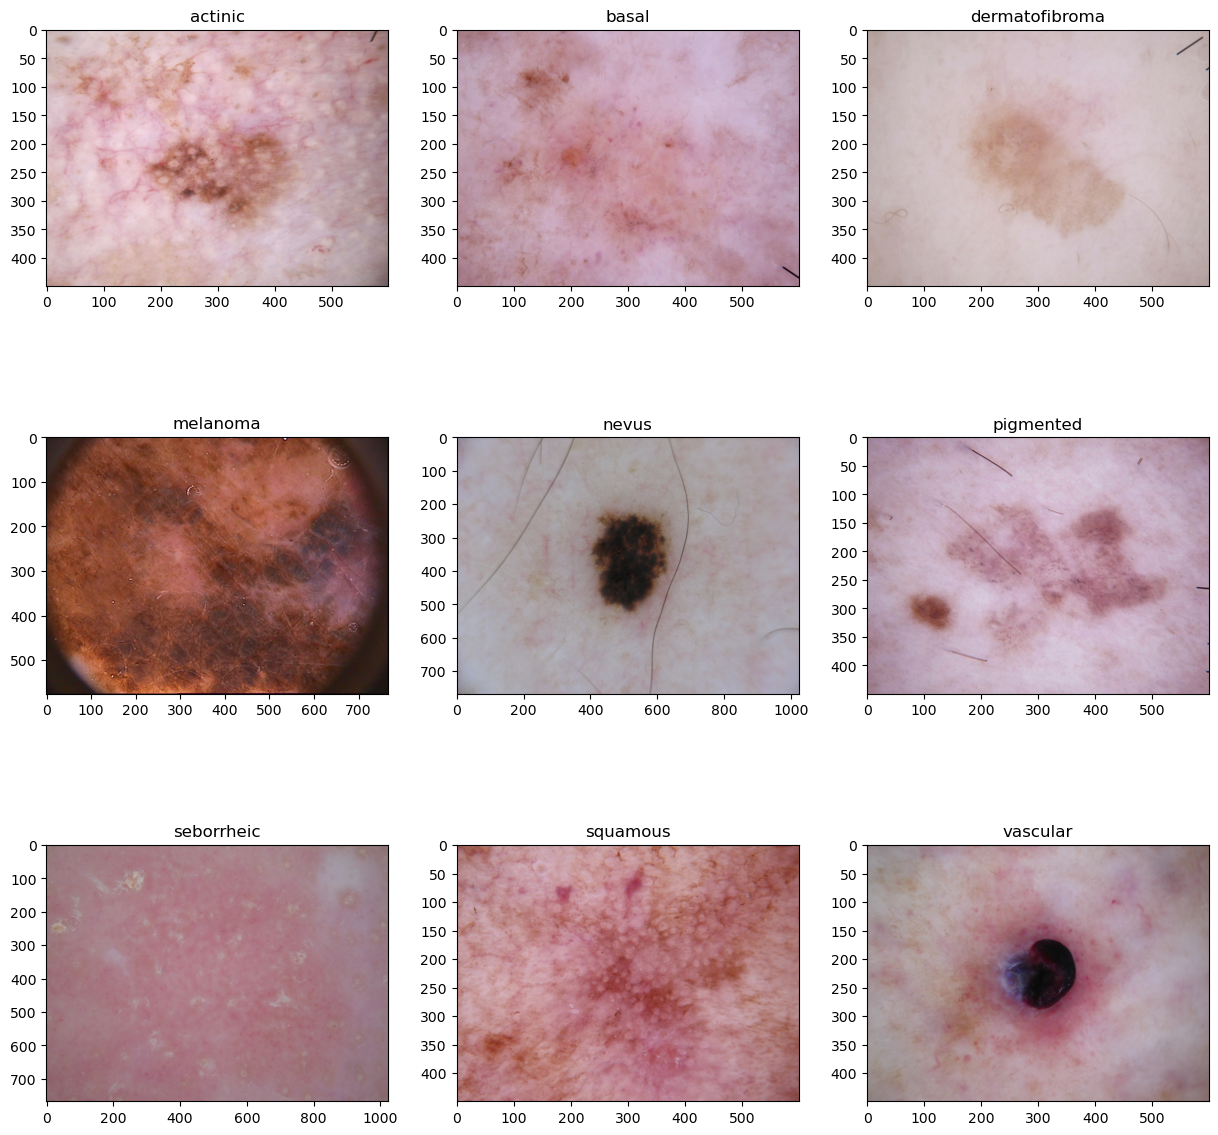

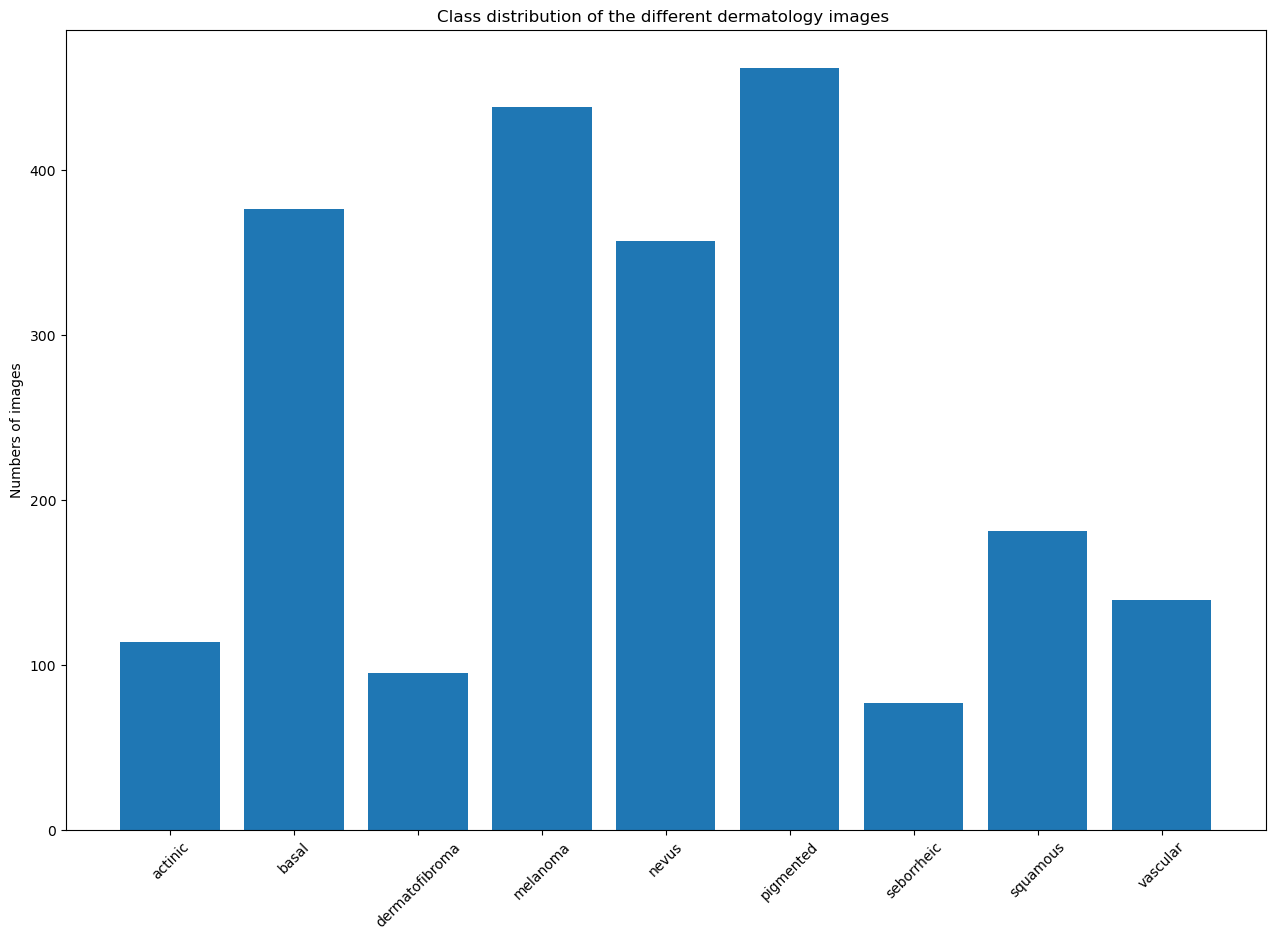

Number of samples for each class: 
actinic  -  114
basal  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented  -  462
seborrheic  -  77
squamous  -  181
vascular  -  139


In [4]:
# Visualize what's inside each class
class_names = utilInstance.class_names
mel.Visualizer.data_viewer(dbpath, class_names)

In [5]:
epochs = 20
cnn1 = mel.CNN(train_ds, val_ds, epochs)
augmentation_type = None
history = cnn1.trainData(train_ds, val_ds, img_height, img_width, class_names, augmentation_type, epochs)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 128)       0

2023-10-12 22:16:17.391296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-10-12 22:16:17.411216: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245720000 Hz
2023-10-12 22:16:27.576301: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 45 of 1000
2023-10-12 22:16:28.213564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.
2023-10-12 22:16:28.216124: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-10-12 22:16:28.798983: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-10-12 22:16:29.441487: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-10-12 22:16:29.441511: W tensorflow/stream_executor/gp

56/56 [==============================] - 28s 89ms/step - loss: 2.0496 - accuracy: 0.2422 - val_loss: 1.9140 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 1s 9ms/step - loss: 1.6665 - accuracy: 0.4062 - val_loss: 1.5473 - val_accuracy: 0.4631
Epoch 3/20
56/56 [==============================] - 1s 10ms/step - loss: 1.5262 - accuracy: 0.4699 - val_loss: 1.3962 - val_accuracy: 0.5168
Epoch 4/20
56/56 [==============================] - 1s 10ms/step - loss: 1.3772 - accuracy: 0.5195 - val_loss: 1.3597 - val_accuracy: 0.5369
Epoch 5/20
56/56 [==============================] - 0s 9ms/step - loss: 1.3092 - accuracy: 0.5357 - val_loss: 1.4089 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 0s 9ms/step - loss: 1.2848 - accuracy: 0.5424 - val_loss: 1.3341 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 0s 9ms/step - loss: 1.2469 - accuracy: 0.5547 - val_loss: 1.3886 - val_accuracy: 0.5056
Epoch 8/20
56/56 [=========

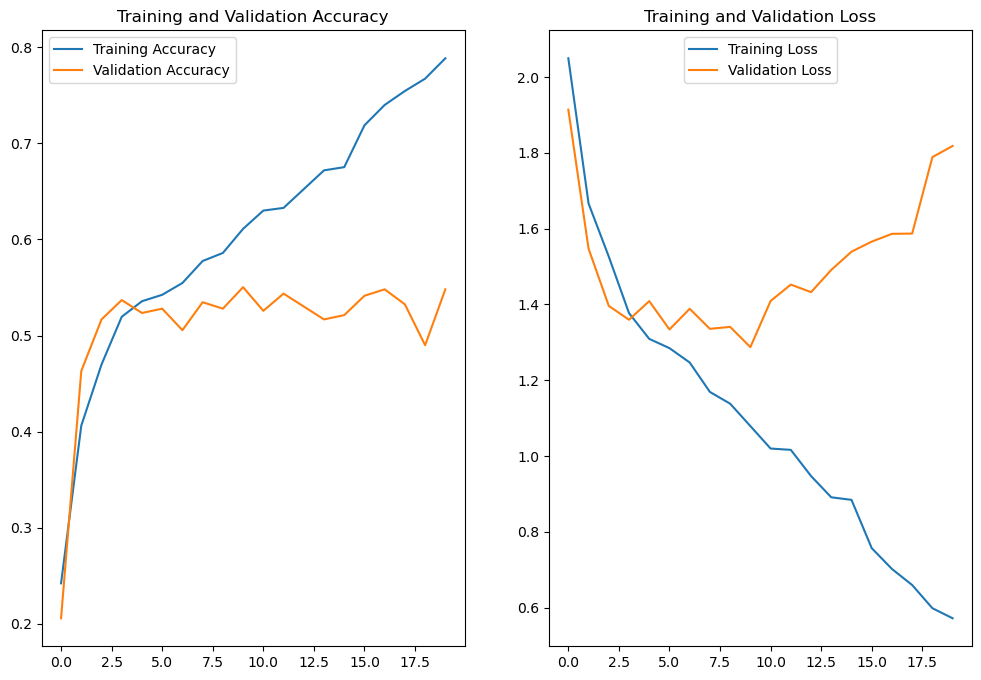

In [6]:
mel.Visualizer.show_performance(history)

In [7]:
# Add augmentation layer (sequential)
# The gap of accuracy/loss between training and validation decreased a lot
# However, the validation accuracy is still low
augmentation_type = mel.simple_augmentation()
history2 = cnn1.trainData(train_ds, val_ds, img_height, img_width, class_names, augmentation_type, epochs)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 128)      

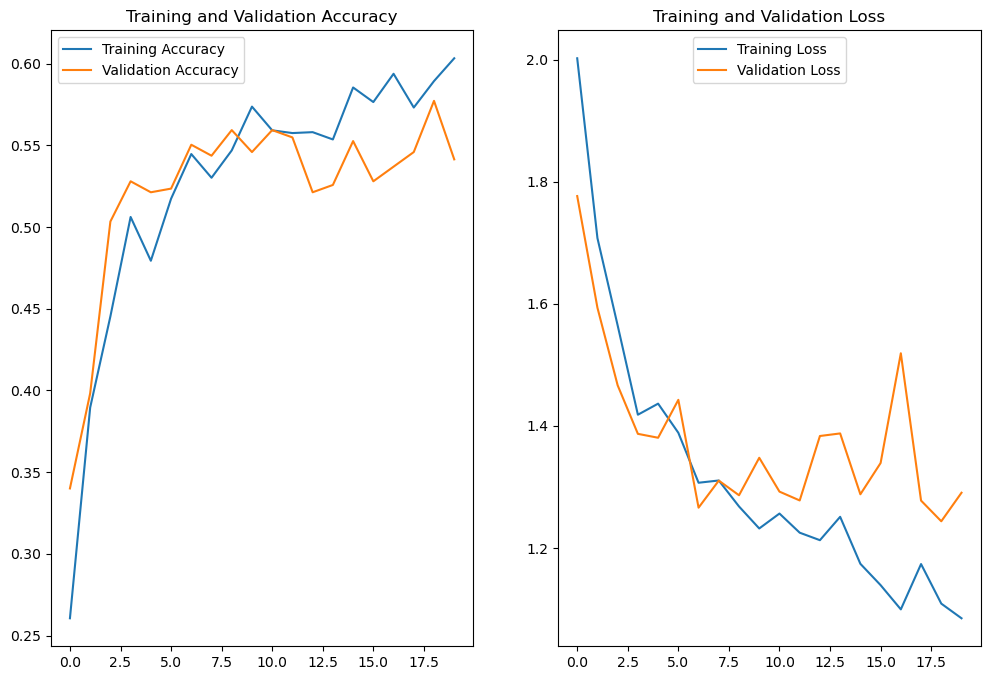

In [8]:
mel.Visualizer.show_performance(history2)

Reloading 'melanoma.visualizer'.
/home/sanghyuk.kim001/MELANOMA/melanoma-detection-CNN/ISICdb
/home/sanghyuk.kim001/MELANOMA/melanoma-detection-CNN/ISICdb/Train
idx:  0 name:  actinic
Augmentation for actinic already exists
idx:  1 name:  basal
Augmentation for basal already exists
idx:  2 name:  dermatofibroma
Augmentation for dermatofibroma already exists
idx:  3 name:  melanoma
Augmentation for melanoma already exists
idx:  4 name:  nevus
Augmentation for nevus already exists
idx:  5 name:  pigmented
Augmentation for pigmented already exists
idx:  6 name:  seborrheic
Augmentation for seborrheic already exists
idx:  7 name:  squamous
Augmentation for squamous already exists
idx:  8 name:  vascular
Augmentation for vascular already exists
Newly generated images with the Augmentor library: 4500


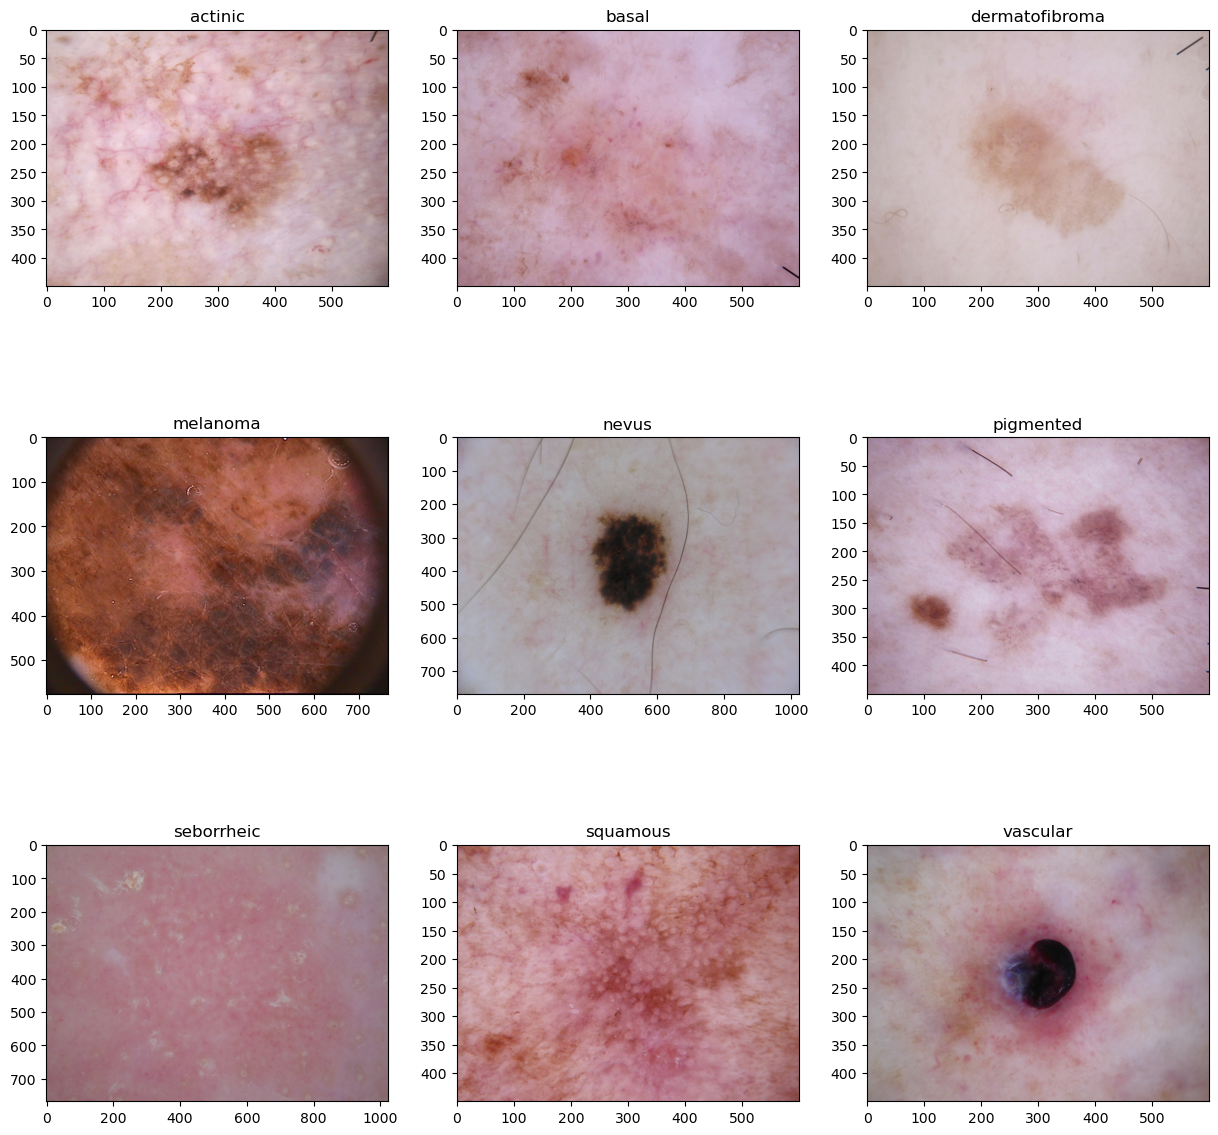

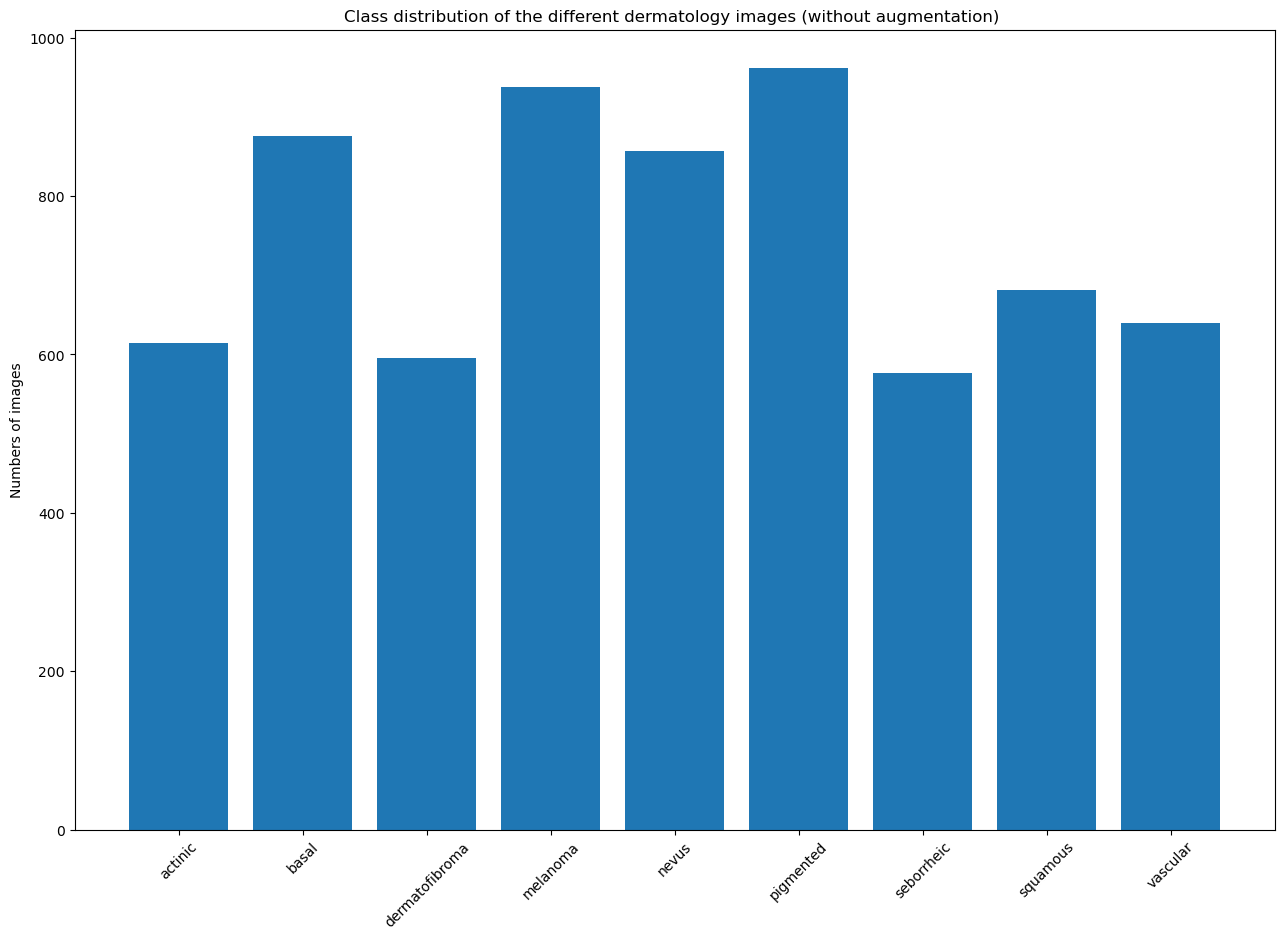

Number of samples for each class (without augmentation):
actinic  -  114
basal  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented  -  462
seborrheic  -  77
squamous  -  181
vascular  -  139

Number of samples for each class (with augmentation):
actinic  -  614
basal  -  876
dermatofibroma  -  595
melanoma  -  938
nevus  -  857
pigmented  -  962
seborrheic  -  577
squamous  -  681
vascular  -  639


In [61]:
import os

notebook_path = os.getcwd() + '/ISICdb'
print(notebook_path)

# path = './ISICdb'
mel.Augmentation(mel.generate_augmentation()).augment_and_save(class_names, notebook_path, numSamplesToAdd=500)

# Visualize what's inside each class
class_names = utilInstance.class_names
mel.Visualizer.data_viewer(dbpath, class_names)


In [64]:
# Load data again
train_ds_new, val_ds_new = utilInstance.loadTrainData()

epochs = 20
augmentation_type = None
history3 = cnn1.trainData(train_ds_new, val_ds_new, img_height, img_width, class_names, augmentation_type, epochs)

path:  ISICdb/Train
seed value:  1
color_mode:  rgb
Images available in train dataset: 2239
trainDataPath:  ISICdb/Train
Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Training classes are: 
['actinic', 'basal', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented', 'seborrheic', 'squamous', 'vascular']
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 64)  

2023-10-13 00:42:53.603620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 92 of 1000


 20/169 [==>...........................] - ETA: 1s - loss: 2.5129 - accuracy: 0.1063

2023-10-13 00:43:00.291669: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


169/169 [==============================] - 23s 34ms/step - loss: 2.0568 - accuracy: 0.2240 - val_loss: 1.6181 - val_accuracy: 0.4150
Epoch 2/20
169/169 [==============================] - 2s 10ms/step - loss: 1.5393 - accuracy: 0.4073 - val_loss: 1.3532 - val_accuracy: 0.5093
Epoch 3/20
169/169 [==============================] - 1s 9ms/step - loss: 1.3631 - accuracy: 0.4889 - val_loss: 1.2138 - val_accuracy: 0.5553
Epoch 4/20
169/169 [==============================] - 1s 9ms/step - loss: 1.2307 - accuracy: 0.5378 - val_loss: 1.1175 - val_accuracy: 0.6117
Epoch 5/20
169/169 [==============================] - 1s 8ms/step - loss: 1.0972 - accuracy: 0.5896 - val_loss: 0.9863 - val_accuracy: 0.6592
Epoch 6/20
169/169 [==============================] - 1s 9ms/step - loss: 0.9842 - accuracy: 0.6393 - val_loss: 0.8840 - val_accuracy: 0.6882
Epoch 7/20
169/169 [==============================] - 1s 8ms/step - loss: 0.8728 - accuracy: 0.6843 - val_loss: 0.8982 - val_accuracy: 0.6689
Epoch 8/20
169

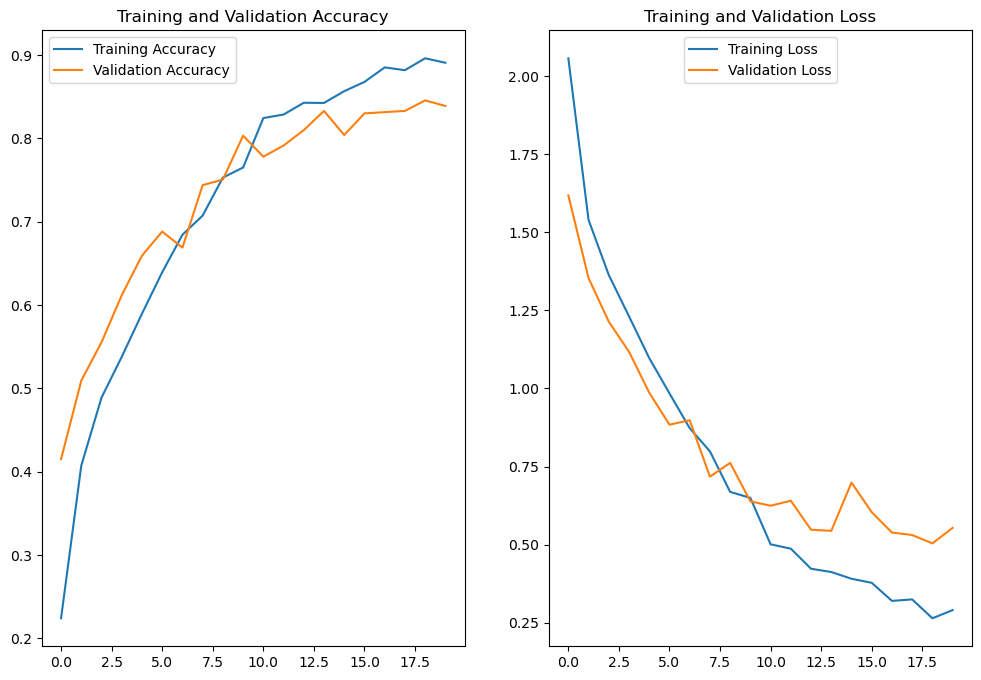

In [65]:
# Accuracy increased a lot
# Training accuracy and Validation accuracy similar
# Lower loss and similar loss between training/validation
mel.Visualizer.show_performance(history3)